In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('pubg-weapon-stats.csv')
data.head(5)

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [3]:
data.shape

(44, 20)

In [4]:
data.columns

Index(['Weapon Name', 'Weapon Type', 'Bullet Type', 'Damage',
       'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire',
       'Shots to Kill (Chest)', 'Shots to Kill (Head)', 'Damage Per Second',
       'Fire Mode', 'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1',
       'HDMG_2', 'HDMG_3'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

In [6]:
data.describe()

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
count,38.000000,44.000000,44.000000,38.000000,36.000000,44.000000,44.000000,44.000000,44.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,6.747632,63.340909,18.431818,403.552632,615.777778,0.388670,3.840909,2.136364,394.102500,68.081081,47.929730,41.02973,30.762162,125.756757,88.024324,75.418919,56.554054
std,3.336421,47.134613,18.421925,297.886492,256.455077,0.712255,1.829261,0.851562,230.785698,57.379254,40.074853,34.22249,25.699852,66.445937,46.555728,39.888009,29.872717
min,0.300000,18.000000,1.000000,25.000000,250.000000,0.010000,1.000000,1.000000,28.000000,22.400000,15.700000,13.40000,10.100000,44.900000,31.400000,26.900000,20.200000
25%,5.560000,41.000000,5.000000,52.500000,350.000000,0.063375,3.000000,2.000000,199.377500,41.000000,30.100000,25.80000,19.300000,96.300000,67.400000,57.800000,43.300000
50%,7.620000,48.500000,12.500000,400.000000,715.000000,0.091000,4.000000,2.000000,463.000000,47.000000,33.800000,28.90000,21.700000,109.600000,76.700000,65.700000,49.300000
75%,9.000000,60.250000,30.000000,600.000000,859.750000,0.347500,4.250000,2.250000,509.000000,60.900000,42.600000,36.50000,27.400000,136.300000,95.400000,81.700000,61.300000
max,12.000000,216.000000,100.000000,900.000000,990.000000,3.800000,10.000000,4.000000,1080.000000,282.600000,198.000000,169.20000,126.900000,312.300000,218.700000,187.200000,140.400000


In [7]:
data.dropna(axis=0,inplace=True)

In [8]:
data.shape

(35, 20)

In [10]:
#Grouping that Data of Weapon Type 
data.groupby('Weapon Type').mean()

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
Weapon Type,,,,,,,,,,,,,,,,,
Assault Rifle,6.384000,45.200000,30.000000,530.000000,816.500000,0.064600,4.000000,2.000000,498.9000,43.700,31.640000,27.120000,20.290000,106.170000,74.330000,63.680000,47.750000
Designed Marksman Rifle,7.163333,50.833333,11.666667,733.333333,763.000000,0.023333,3.000000,2.000000,534.5000,53.700,37.566667,32.183333,24.133333,120.216667,84.116667,72.100000,54.066667
Light Machine Gun,6.590000,48.000000,73.500000,500.000000,815.000000,0.092000,4.000000,2.000000,534.0000,48.000,33.500000,28.800000,21.550000,110.350000,77.250000,66.150000,49.600000
Pistol,6.517500,38.500000,11.500000,25.000000,333.750000,0.177500,5.500000,3.000000,288.1275,38.075,26.650000,22.800000,17.100000,76.200000,53.325000,45.675000,34.275000
Shotgun,12.000000,210.000000,4.000000,25.000000,360.000000,0.383333,1.000000,1.000000,720.0000,231.600,162.300000,138.600000,104.100000,269.100000,188.400000,161.400000,120.900000
Sniper Rifle,3.997500,81.250000,5.000000,775.000000,792.500000,1.537500,2.000000,1.250000,64.5000,99.675,69.725000,59.725000,44.825000,205.500000,143.825000,123.250000,92.525000
Submachine Gun,6.150000,34.000000,30.333333,208.333333,301.666667,0.070250,5.333333,3.166667,484.0000,34.000,23.783333,20.383333,15.266667,61.200000,42.783333,36.666667,27.500000


In [12]:
data.groupby('Weapon Type')['Damage'].count()

Weapon Type
Assault Rifle              10
Designed Marksman Rifle     6
Light Machine Gun           2
Pistol                      4
Shotgun                     3
Sniper Rifle                4
Submachine Gun              6
Name: Damage, dtype: int64

Text(0.5, 1.0, 'Weapon type vs damage')

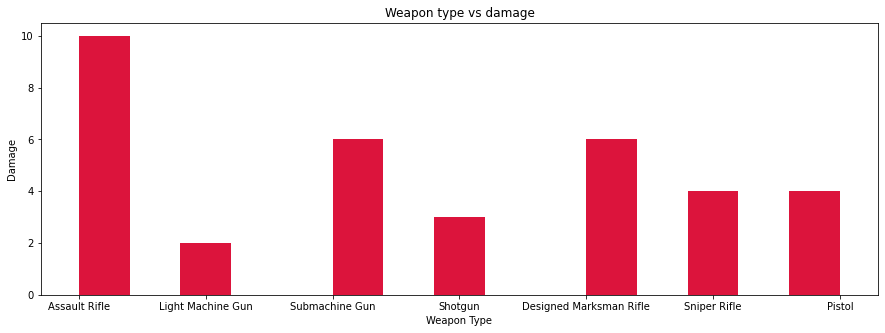

In [13]:
plt.figure(figsize=(15,5))
plt.hist(data['Weapon Type'],bins=15,color="crimson")
plt.xlabel("Weapon Type")
plt.ylabel("Damage")
plt.title("Weapon type vs damage")

Text(0.5, 1.0, 'Weapon type vs damage')

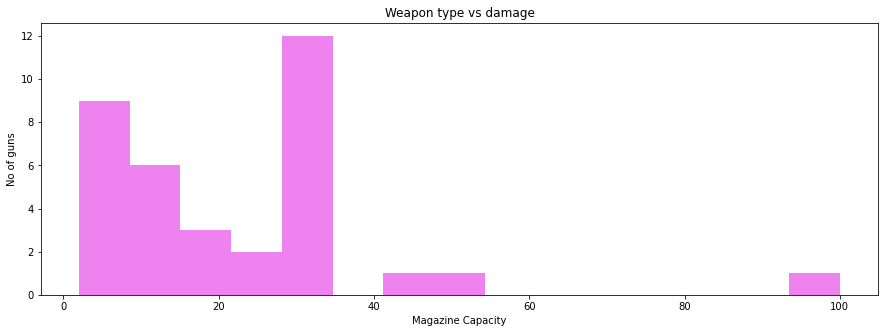

In [15]:
plt.figure(figsize=(15,5))
plt.hist(data['Magazine Capacity'],bins=15,color="violet")
plt.xlabel("Magazine Capacity")
plt.ylabel("No of guns")
plt.title("Weapon type vs damage")

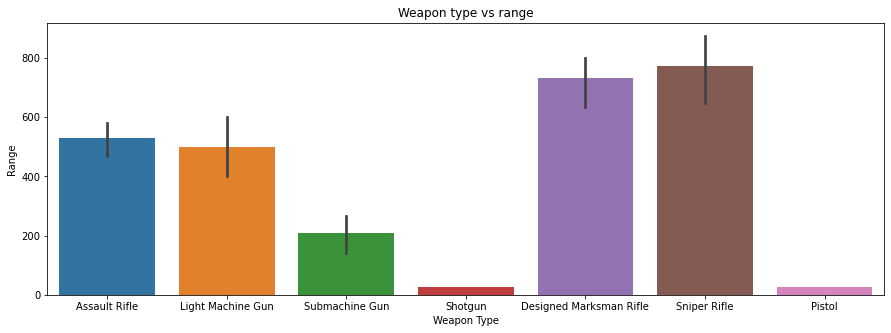

In [16]:
# Weapon Type Vs It's Range in Meters(i.e., How far the Bullet Travels
plt.figure(figsize=(15,5))
sns.barplot(x='Weapon Type', y = 'Range',data=data)
plt.xlabel("Weapon Type")
plt.ylabel("Range")
plt.title("Weapon type vs range")
plt.show()

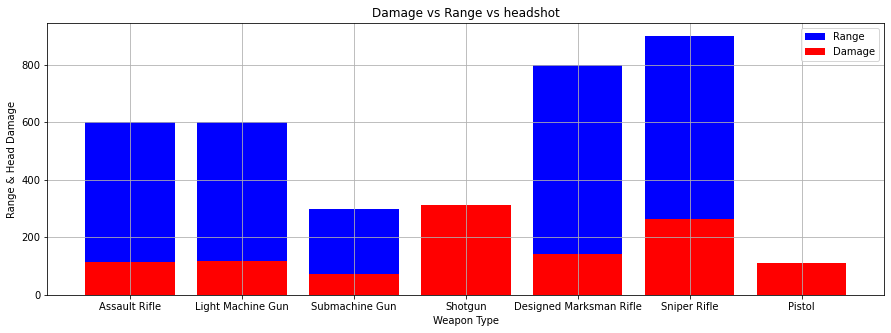

In [18]:
# comparision between Range and Damage of different Weapon Type(head damage without weapon)
plt.figure(figsize=(15,5))
plt.bar(data["Weapon Type"],data["Range"],label="Range",color="blue")
plt.bar(data["Weapon Type"],data["HDMG_0"],label="Damage",color="red")
plt.xlabel('Weapon Type')
plt.ylabel('Range & Head Damage')
plt.title('Damage vs Range vs headshot')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
#Weapon Type vs Damage
dup = data.groupby('Weapon Type')['Damage'].mean().reset_index()
dup

,Weapon Type,Damage
0,Assault Rifle,45.200000
1,Designed Marksman Rifle,50.833333
2,Light Machine Gun,48.000000
3,Pistol,38.500000
4,Shotgun,210.000000
5,Sniper Rifle,81.250000
6,Submachine Gun,34.000000


<AxesSubplot:xlabel='Damage', ylabel='Weapon Type'>

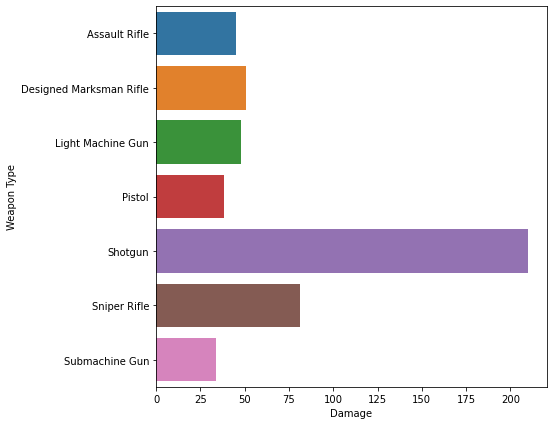

In [20]:
plt.figure(figsize=(7,7))
sns.barplot(y = 'Weapon Type', x = 'Damage', data = dup)

In [21]:
# Weapon Type vs Range
dup1 = data.groupby('Weapon Type')['Range'].mean().reset_index()
dup1

,Weapon Type,Range
0,Assault Rifle,530.000000
1,Designed Marksman Rifle,733.333333
2,Light Machine Gun,500.000000
3,Pistol,25.000000
4,Shotgun,25.000000
5,Sniper Rifle,775.000000
6,Submachine Gun,208.333333


<AxesSubplot:xlabel='Range', ylabel='Weapon Type'>

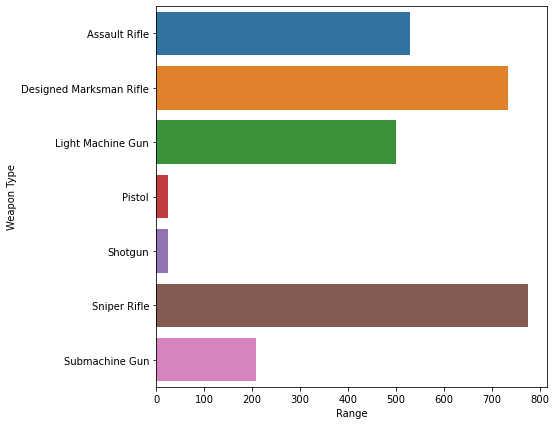

In [22]:
plt.figure(figsize=(7,7))
sns.barplot(y = 'Weapon Type', x = 'Range', data = dup1)

In [23]:
#Weapon Type vs Bullet Speed
dup2 = data.groupby('Weapon Type')['Bullet Speed'].mean().reset_index()
dup2

,Weapon Type,Bullet Speed
0,Assault Rifle,816.500000
1,Designed Marksman Rifle,763.000000
2,Light Machine Gun,815.000000
3,Pistol,333.750000
4,Shotgun,360.000000
5,Sniper Rifle,792.500000
6,Submachine Gun,301.666667


<AxesSubplot:xlabel='Bullet Speed', ylabel='Weapon Type'>

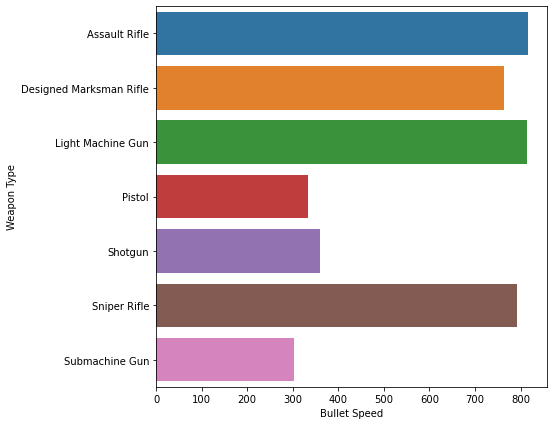

In [24]:
plt.figure(figsize=(7,7))
sns.barplot(y = 'Weapon Type', x = 'Bullet Speed', data = dup2)

In [25]:
#Weapon Type vs Rate of Fire
dup3 = data.groupby('Weapon Type')['Rate of Fire'].mean().reset_index()
dup3

,Weapon Type,Rate of Fire
0,Assault Rifle,0.064600
1,Designed Marksman Rifle,0.023333
2,Light Machine Gun,0.092000
3,Pistol,0.177500
4,Shotgun,0.383333
5,Sniper Rifle,1.537500
6,Submachine Gun,0.070250


<AxesSubplot:xlabel='Rate of Fire', ylabel='Weapon Type'>

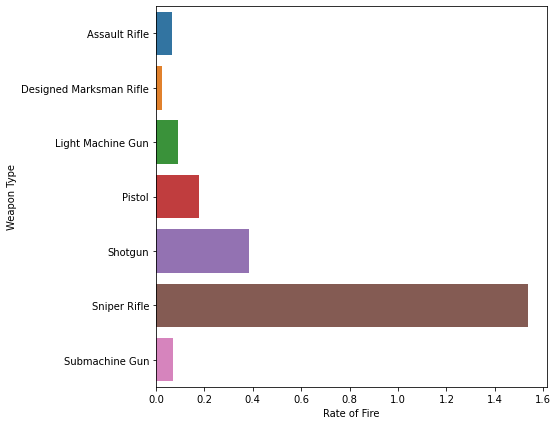

In [26]:
plt.figure(figsize=(7,7))
sns.barplot(y = 'Weapon Type', x = 'Rate of Fire', data = dup3)

# By Comparing all four Categories together, from all the above Analysis and Visualization we can say that :
# Assualt Rifle + Sniper Rifle is the Best Combo of Guns and is more Efficient. So lets Visualize them Individually for the same 4 different Categories

In [27]:
#1 Damage 
dup4 = data[data['Weapon Type'] == "Assault Rifle"][["Weapon Name","Damage"]].sort_values("Damage",ascending=False)
dup4

,Weapon Name,Damage
0,Groza,49
1,AKM,49
3,MK47 Mutant,49
2,M762,47
4,AUG A3,43
5,SCAR-L,43
6,M416,43
7,M16A4,43
8,G36C,43
9,OBZ,43


<AxesSubplot:xlabel='Damage', ylabel='Weapon Name'>

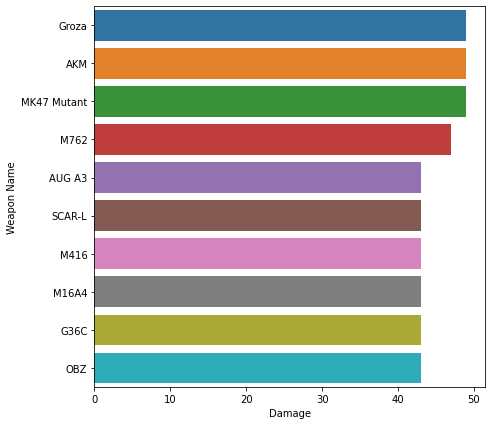

In [29]:
plt.figure(figsize=(7,7))
sns.barplot(y = 'Weapon Name', x = 'Damage', data = dup4)

In [30]:
#Sniper Rifle Visualization
dup5 = data[data['Weapon Type'] == "Sniper Rifle"][["Weapon Name","Damage"]].sort_values("Damage",ascending=False)
dup5

,Weapon Name,Damage
27,AWM,105
28,M24,79
29,Kar98,75
30,Win94,66


<AxesSubplot:xlabel='Damage', ylabel='Weapon Name'>

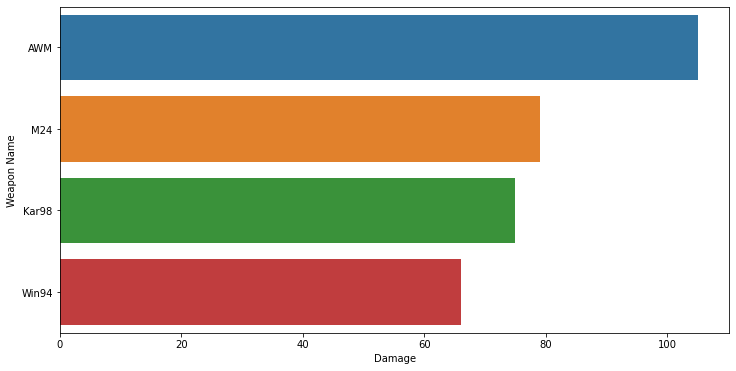

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Weapon Name', x = 'Damage', data = dup5)

In [32]:
# 2 Range
dup6 = data[data["Weapon Type"] == "Assault Rifle"][["Weapon Name","Range"]].sort_values("Range",ascending=False)
dup6

,Weapon Name,Range
4,AUG A3,600.0
5,SCAR-L,600.0
6,M416,600.0
7,M16A4,600.0
8,G36C,600.0
9,OBZ,600.0
3,MK47 Mutant,500.0
0,Groza,400.0
1,AKM,400.0
2,M762,400.0


<AxesSubplot:xlabel='Range', ylabel='Weapon Name'>

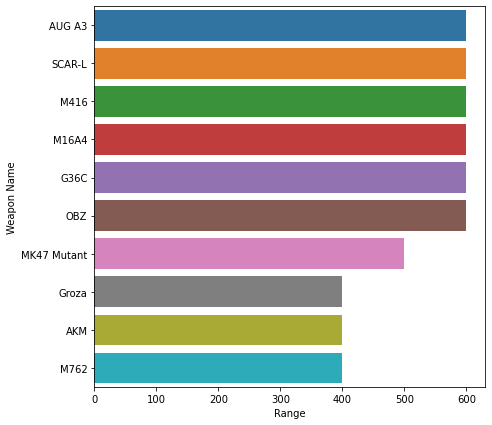

In [33]:
plt.figure(figsize=(7,7))
sns.barplot(y = 'Weapon Name', x = 'Range', data = dup6)

In [34]:
dup7 = data[data["Weapon Type"] == "Sniper Rifle"][["Weapon Name","Range"]].sort_values("Range",ascending=False)
dup7

,Weapon Name,Range
27,AWM,900.0
28,M24,800.0
29,Kar98,800.0
30,Win94,600.0


<AxesSubplot:xlabel='Range', ylabel='Weapon Name'>

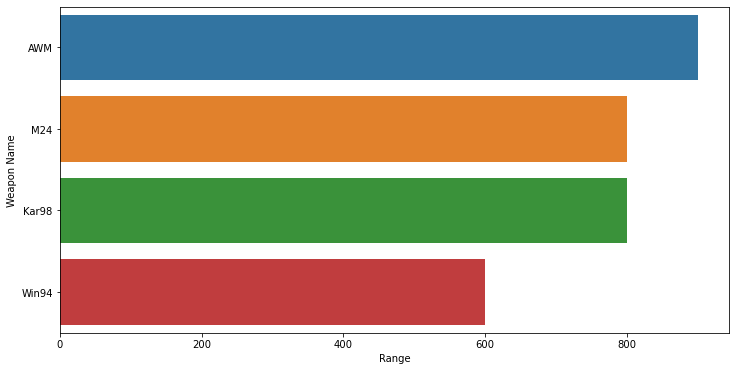

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Weapon Name', x = 'Range', data = dup7)

In [36]:
#3 Bullet speed
dup8 = data[data["Weapon Type"] == "Assault Rifle"][["Weapon Name","Bullet Speed"]].sort_values("Bullet Speed",ascending=False)
dup8

,Weapon Name,Bullet Speed
7,M16A4,900.0
6,M416,890.0
4,AUG A3,880.0
5,SCAR-L,880.0
8,G36C,880.0
9,OBZ,880.0
0,Groza,715.0
2,M762,715.0
3,MK47 Mutant,715.0
1,AKM,710.0


<AxesSubplot:xlabel='Bullet Speed', ylabel='Weapon Name'>

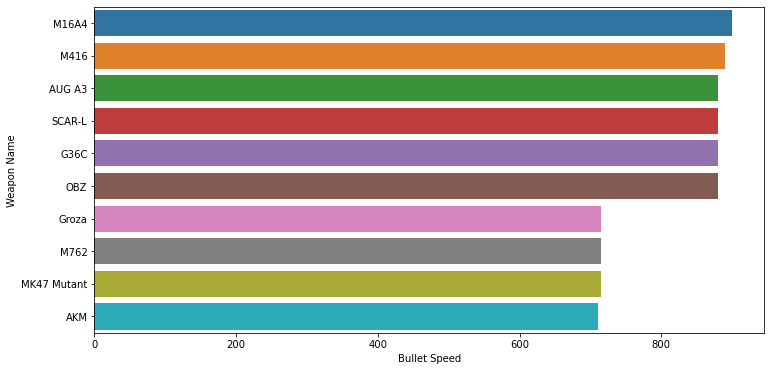

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Weapon Name', x = 'Bullet Speed', data = dup8)

In [38]:
dup9 = data[data["Weapon Type"] == "Sniper Rifle"][["Weapon Name","Bullet Speed"]].sort_values("Bullet Speed",ascending=False)
dup9

,Weapon Name,Bullet Speed
27,AWM,910.0
28,M24,790.0
29,Kar98,760.0
30,Win94,710.0


<AxesSubplot:xlabel='Bullet Speed', ylabel='Weapon Name'>

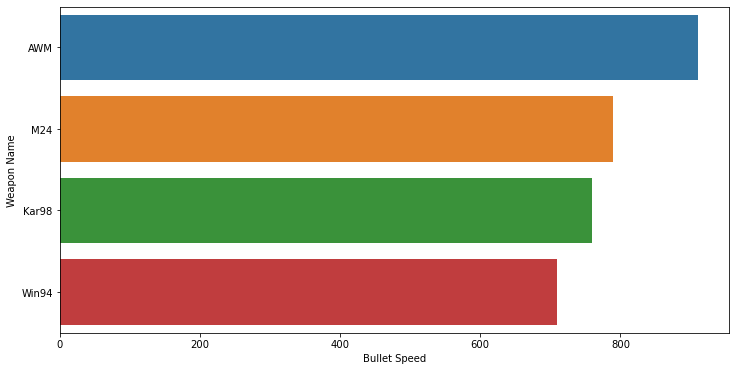

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Weapon Name', x = 'Bullet Speed', data = dup9)

In [40]:
#4 Rate of fire
dup10= data[data["Weapon Type"] == "Assault Rifle"][["Weapon Name","Rate of Fire"]].sort_values("Rate of Fire",ascending=False)
dup10

,Weapon Name,Rate of Fire
5,SCAR-L,0.096
9,OBZ,0.096
2,M762,0.086
4,AUG A3,0.086
6,M416,0.086
8,G36C,0.086
0,Groza,0.080
1,AKM,0.010
3,MK47 Mutant,0.010
7,M16A4,0.010


<AxesSubplot:xlabel='Rate of Fire', ylabel='Weapon Name'>

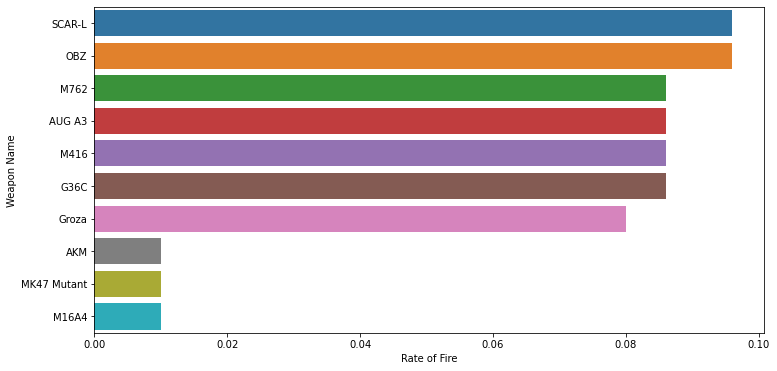

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Weapon Name', x = 'Rate of Fire', data = dup10)

In [42]:
dup11= data[data["Weapon Type"] == "Sniper Rifle"][["Weapon Name","Rate of Fire"]].sort_values("Rate of Fire",ascending=False)
dup11

,Weapon Name,Rate of Fire
29,Kar98,1.90
27,AWM,1.85
28,M24,1.80
30,Win94,0.60


<AxesSubplot:xlabel='Rate of Fire', ylabel='Weapon Name'>

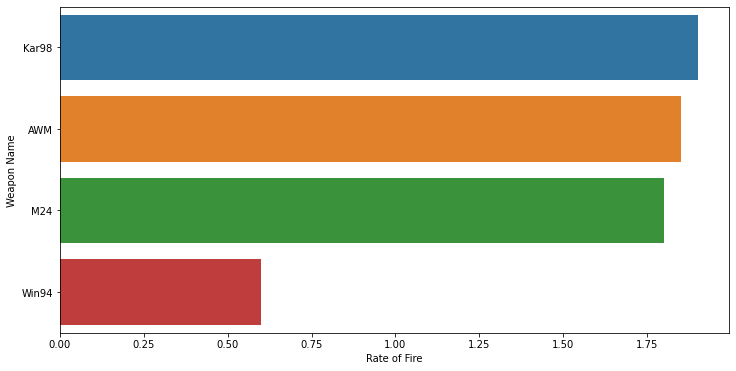

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'Weapon Name', x = 'Rate of Fire', data = dup11)

# These are the Analysis and Visualization on different Categories with respect to Weapon Type.
# From Above Individual Analysis of Every Weapon Name of Assualt and Sniper Rifles, we Conclude that Groza + AWM is the Beast Combination. M249 gives tough competition with Groza, either of them can be used,it's upto player wish